# MobileNetV2 Custom Image Predictor

This notebook loads a pre-trained MobileNetV2 model and predicts custom images for alphanumeric character classification. The model was trained on 96x96 grayscale images representing characters 'a'-'z', 'A'-'Z', with folder names corresponding to ASCII values.

## 🎯 Features:
- **Single Image Prediction**: Predict any custom image with confidence scores
- **Batch Prediction**: Process multiple images from directories
- **Interactive Visualization**: View predictions with original and processed images
- **Top-K Predictions**: See the top 5 most likely characters
- **Simple/Detailed Output**: Toggle between percentage-only or full technical details
- **Performance Analysis**: Analyze prediction confidence and performance

## 📋 Requirements:
- Trained MobileNetV2 model file (`mobilenetv2_alphanum.h5`)
- Custom images (any format: PNG, JPG, JPEG, etc.)
- Python libraries: tensorflow, PIL, matplotlib, numpy

## 🚀 Quick Start:
1. Update the `MODEL_PATH` and `CUSTOM_IMAGE_PATH` variables
2. Run all cells to load the model
3. Use the prediction functions for your custom images

## 1. Setup Environment and Import Libraries

In [1]:
# Import all necessary libraries for image prediction
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image processing libraries
from PIL import Image
import numpy as np
import cv2

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# System and file handling
import os
import glob
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Progress tracking
from tqdm import tqdm

print("=" * 80)
print(" MOBILENETV2 CUSTOM IMAGE PREDICTOR")
print("=" * 80)
print(f" TensorFlow Version: {tf.__version__}")
print(f" GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
if len(tf.config.list_physical_devices('GPU')) > 0:
    print(f" GPU Device: {tf.config.list_physical_devices('GPU')[0]}")
else:
    print("  Using CPU for inference")

print(f" NumPy Version: {np.__version__}")
print("=" * 80)

2025-10-20 15:39:12.147683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-20 15:39:12.162708: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-20 15:39:12.162736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-20 15:39:12.172745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-20 15:39:12.762003: W tensorflow/compiler/tf

 MOBILENETV2 CUSTOM IMAGE PREDICTOR
 TensorFlow Version: 2.16.2
 GPU Available: True
 GPU Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
 NumPy Version: 1.26.4


2025-10-20 15:39:13.933579: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 15:39:13.973075: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 15:39:13.977273: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## 2. Configuration and Path Setup

**🔧 Configuration**: Update these paths according to your setup

In [2]:
# ============================================================================
# 🔧 CONFIGURATION - UPDATE THESE PATHS FOR YOUR SETUP
# ============================================================================
# Dataset paths - Update these paths according to your dataset location
BASE_PATH = "/home/ubuntu/Desktop/AIML project/AlphaNum"
TRAIN_PATH = os.path.join(BASE_PATH, "train")


RESULTS_PATH = "/home/ubuntu/Desktop/AIML project/results/MobileNetV2"
MODEL_PATH = os.path.join(RESULTS_PATH, "mobilenetv2_alphanum.h5")

#  CHANGE THIS TO YOUR CUSTOM IMAGE PATH 
CUSTOM_IMAGE_PATH = "/home/ubuntu/Pictures/asaad.png"


# Output directory for results
OUTPUT_DIR = "/home/ubuntu/Desktop/AIML project/results/MobileNetV2/prediction_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Image preprocessing configuration (must match training)
IMG_HEIGHT = 96
IMG_WIDTH = 96
COLOR_MODE = "grayscale"

print(" Configuration:")
print(f"   Model Path: {MODEL_PATH}")
print(f"   Train Path: {TRAIN_PATH}")
print(f"   Custom Image: {CUSTOM_IMAGE_PATH}")
print(f"   Output Directory: {OUTPUT_DIR}")
print(f"   Image Size: {IMG_HEIGHT}x{IMG_WIDTH}")
print()

# Verify paths exist
if not os.path.exists(MODEL_PATH):
    print(f" Model file not found: {MODEL_PATH}")
    print("   Please train the MobileNetV2 model first!")
else:
    print(f" Model file found: {MODEL_PATH}")

if not os.path.exists(TRAIN_PATH):
    print(f" Training data not found: {TRAIN_PATH}")
    print("   Needed to get class information!")
else:
    print(f" Training data found: {TRAIN_PATH}")

if os.path.exists(CUSTOM_IMAGE_PATH):
    print(f" Custom image found: {CUSTOM_IMAGE_PATH}")
else:
    print(f" Custom image not found: {CUSTOM_IMAGE_PATH}")
    print("   You can update CUSTOM_IMAGE_PATH variable above")

 Configuration:
   Model Path: /home/ubuntu/Desktop/AIML project/results/MobileNetV2/mobilenetv2_alphanum.h5
   Train Path: /home/ubuntu/Desktop/AIML project/AlphaNum/train
   Custom Image: /home/ubuntu/Pictures/asaad.png
   Output Directory: /home/ubuntu/Desktop/AIML project/results/MobileNetV2/prediction_results
   Image Size: 96x96

 Model file found: /home/ubuntu/Desktop/AIML project/results/MobileNetV2/mobilenetv2_alphanum.h5
 Training data found: /home/ubuntu/Desktop/AIML project/AlphaNum/train
 Custom image found: /home/ubuntu/Pictures/asaad.png


## 3. Create Label Mappings

Load the training data structure to get class information and create label mappings.

In [3]:
# ============================================================================
# CREATE LABEL MAPPINGS FROM TRAINING DATA
# ============================================================================

print("\n" + "=" * 60)
print("🔄 CREATING LABEL MAPPINGS")
print("=" * 60)

# Get all folder names (ASCII values) from training directory
allowed_ascii = list(range(ord('a'), ord('z') + 1)) + list(range(ord('A'), ord('Z') + 1))

# Collect unique labels from training directory
unique_labels = []
for folder_name in sorted(os.listdir(TRAIN_PATH)):
    folder_path = os.path.join(TRAIN_PATH, folder_name)
    if os.path.isdir(folder_path):
        if folder_name == '999' or (folder_name.isdigit() and int(folder_name) in allowed_ascii):
            label = int(folder_name) if folder_name.isdigit() else 999
            unique_labels.append(label)

unique_labels = sorted(list(set(unique_labels)))

# Create label mappings
label_mapping = {original_label: new_label for new_label, original_label in enumerate(unique_labels)}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

num_classes = len(unique_labels)

print(f" Found {num_classes} classes")
print(f"   Sample ASCII codes: {unique_labels[:10]}...")
print(f"\n Sample Label Mappings:")

for i in range(min(10, len(unique_labels))):
    original = unique_labels[i]
    mapped = label_mapping[original]
    if original != 999:
        char = chr(original)
        print(f"   ASCII {original} ('{char}') → Model Index {mapped}")
    else:
        print(f"   ASCII {original} ('NULL') → Model Index {mapped}")

if len(unique_labels) > 10:
    print(f"   ... and {len(unique_labels) - 10} more classes")

print("\n Label mappings created successfully!")


🔄 CREATING LABEL MAPPINGS
 Found 53 classes
   Sample ASCII codes: [65, 66, 67, 68, 69, 70, 71, 72, 73, 74]...

 Sample Label Mappings:
   ASCII 65 ('A') → Model Index 0
   ASCII 66 ('B') → Model Index 1
   ASCII 67 ('C') → Model Index 2
   ASCII 68 ('D') → Model Index 3
   ASCII 69 ('E') → Model Index 4
   ASCII 70 ('F') → Model Index 5
   ASCII 71 ('G') → Model Index 6
   ASCII 72 ('H') → Model Index 7
   ASCII 73 ('I') → Model Index 8
   ASCII 74 ('J') → Model Index 9
   ... and 43 more classes

 Label mappings created successfully!


## 4. Load Saved Model

Load the pre-trained MobileNetV2 model from disk.

In [4]:
# ============================================================================
# LOAD SAVED MOBILENETV2 MODEL
# ============================================================================

print("\n" + "=" * 60)
print(" LOADING MOBILENETV2 MODEL")
print("=" * 60)

try:
    # Load the model
    loaded_model = load_model(MODEL_PATH)
    
    print("✅ Model loaded successfully!")
    print(f"   Architecture: MobileNetV2 (modified for {IMG_HEIGHT}x{IMG_WIDTH} grayscale)")
    print(f"   Input shape: {loaded_model.input_shape}")
    print(f"   Output classes: {loaded_model.output_shape[-1]}")
    print(f"   Total parameters: {loaded_model.count_params():,}")
    
    # Verify model output matches expected classes
    if loaded_model.output_shape[-1] != num_classes:
        print(f"\n  WARNING: Model has {loaded_model.output_shape[-1]} output classes")
        print(f"            but found {num_classes} classes in training data!")
    
    print("\n Model ready for predictions!")
    
except Exception as e:
    print(f" Error loading model: {str(e)}")
    print("\n💡 Troubleshooting:")
    print("   1. Verify the model file exists at the specified path")
    print("   2. Ensure the model was trained and saved properly")
    print("   3. Check TensorFlow version compatibility")
    loaded_model = None


 LOADING MOBILENETV2 MODEL


2025-10-20 15:39:14.200741: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 15:39:14.205668: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 15:39:14.209965: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

✅ Model loaded successfully!
   Architecture: MobileNetV2 (modified for 96x96 grayscale)
   Input shape: (None, 96, 96, 1)
   Output classes: 53
   Total parameters: 2,325,907

 Model ready for predictions!


## 5. Image Preprocessing Functions

Define preprocessing functions that match the training configuration.

In [5]:
# ============================================================================
# IMAGE PREPROCESSING FUNCTIONS
# ============================================================================

def preprocess_image(image_path, show_steps=False):
    """
    Preprocess a single image for model prediction.
    
    Args:
        image_path: Path to the image file
        show_steps: Whether to visualize preprocessing steps
        
    Returns:
        image_array: Preprocessed image array ready for model (with batch dimension)
        original_image: Original PIL image
        processed_image: Processed PIL image (96x96 grayscale)
    """
    try:
        # Load original image
        original_image = Image.open(image_path)
        original_size = original_image.size
        
        # Load and preprocess for model (matches training)
        img = load_img(image_path, color_mode=COLOR_MODE, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        
        # Create processed image for visualization
        processed_image = original_image.convert('L').resize((IMG_HEIGHT, IMG_WIDTH))
        
        if show_steps:
            fig, axes = plt.subplots(1, 3, figsize=(12, 4))
            
            # Original
            axes[0].imshow(original_image, cmap='gray' if original_image.mode == 'L' else None)
            axes[0].set_title(f'Original\n{original_size}', fontweight='bold')
            axes[0].axis('off')
            
            # Grayscale
            gray_img = original_image.convert('L')
            axes[1].imshow(gray_img, cmap='gray')
            axes[1].set_title(f'Grayscale\n{gray_img.size}', fontweight='bold')
            axes[1].axis('off')
            
            # Resized
            axes[2].imshow(processed_image, cmap='gray')
            axes[2].set_title(f'Processed\n({IMG_HEIGHT}x{IMG_WIDTH})', fontweight='bold')
            axes[2].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            print(f"📸 Image preprocessing complete:")
            print(f"   Original size: {original_size}")
            print(f"   Final size: ({IMG_HEIGHT}, {IMG_WIDTH})")
            print(f"   Array shape: {img_array.shape}")
        
        return img_array, original_image, processed_image
        
    except Exception as e:
        print(f" Error preprocessing image {image_path}: {str(e)}")
        return None, None, None

def ascii_to_character(ascii_code):
    """Convert ASCII code to readable character."""
    try:
        if ascii_code == 999:
            return 'NULL'
        return chr(int(ascii_code))
    except (ValueError, OverflowError):
        return 'UNKNOWN'

print(" Preprocessing functions defined successfully!")
print(f" Transform pipeline: Load → Grayscale → Resize({IMG_HEIGHT}x{IMG_WIDTH}) → Normalize")

 Preprocessing functions defined successfully!
 Transform pipeline: Load → Grayscale → Resize(96x96) → Normalize


## 6. Detailed Prediction Function

Predict a single image with comprehensive analysis and visualization.

In [6]:
# ============================================================================
# DETAILED IMAGE PREDICTION FUNCTION
# ============================================================================

def predict_image_with_details(image_path, model, top_k=5, show_full_details=False):
    """
    Predict a single image with detailed analysis.
    
    Args:
        image_path: Path to the image file
        model: Loaded MobileNetV2 model
        top_k: Number of top predictions to show
        show_full_details: If False, show only percentages; If True, show all technical details
        
    Returns:
        results: Dictionary with prediction results
    """
    print("\n" + "=" * 70)
    print(f" PREDICTING IMAGE: {os.path.basename(image_path)}")
    print("=" * 70)
    
    # Preprocess image
    image_array, original_image, processed_image = preprocess_image(image_path, show_steps=show_full_details)
    
    if image_array is None:
        return None
    
    # Make prediction
    predictions = model.predict(image_array, verbose=0)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index] * 100
    
    # Get top-k predictions
    top_k_indices = np.argsort(predictions[0])[-top_k:][::-1]
    top_k_probs = predictions[0][top_k_indices] * 100
    
    # Get predicted character
    predicted_original_label = reverse_label_mapping[predicted_class_index]
    predicted_char = ascii_to_character(predicted_original_label)
    
    # Create top-k results
    top_predictions = []
    for i, (idx, prob) in enumerate(zip(top_k_indices, top_k_probs)):
        original_label = reverse_label_mapping[idx]
        char = ascii_to_character(original_label)
        top_predictions.append({
            'rank': i + 1,
            'character': char,
            'ascii_code': original_label,
            'confidence': prob,
            'model_index': idx
        })
    
    # Print results based on detail level
    if show_full_details:
        print(f" PREDICTION RESULTS:")
        print(f"    File: {os.path.basename(image_path)}")
        print(f"    Predicted Character: '{predicted_char}'")
        print(f"    ASCII Code: {predicted_original_label}")
        print(f"    Model Index: {predicted_class_index}")
        print(f"    Confidence: {confidence:.2f}%")
        print(f"    Original Size: {original_image.size}")
        print(f"    Processed Size: ({IMG_HEIGHT}, {IMG_WIDTH})")
    else:
        print(f" Predicted: '{predicted_char}' - {confidence:.2f}%")
    
    print(f"\n TOP {top_k} PREDICTIONS:")
    for pred in top_predictions:
        if show_full_details:
            print(f"   {pred['rank']}. '{pred['character']}' (ASCII: {pred['ascii_code']}, Index: {pred['model_index']}) - {pred['confidence']:.2f}%")
        else:
            print(f"   {pred['rank']}. '{pred['character']}' - {pred['confidence']:.2f}%")
    
    # Visualization
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    
    # Original image
    axes[0].imshow(original_image, cmap='gray' if original_image.mode == 'L' else None)
    axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    # Processed image
    axes[1].imshow(processed_image, cmap='gray')
    axes[1].set_title(f'Processed ({IMG_HEIGHT}x{IMG_WIDTH})', fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    # Prediction result
    axes[2].text(0.5, 0.7, f"Prediction: '{predicted_char}'", 
                ha='center', va='center', fontsize=18, fontweight='bold',
                transform=axes[2].transAxes, color='green')
    if show_full_details:
        axes[2].text(0.5, 0.5, f"ASCII: {predicted_original_label}", 
                    ha='center', va='center', fontsize=14,
                    transform=axes[2].transAxes)
    axes[2].text(0.5, 0.3, f"Confidence: {confidence:.2f}%", 
                ha='center', va='center', fontsize=14,
                transform=axes[2].transAxes)
    axes[2].set_xlim(0, 1)
    axes[2].set_ylim(0, 1)
    axes[2].axis('off')
    axes[2].set_title('Result', fontsize=12, fontweight='bold')
    
    # Top predictions bar chart
    chars = [pred['character'] for pred in top_predictions]
    confidences = [pred['confidence'] for pred in top_predictions]
    colors = ['green' if i == 0 else 'orange' if i == 1 else 'gray' for i in range(len(chars))]
    
    bars = axes[3].barh(chars, confidences, color=colors, alpha=0.7)
    axes[3].set_xlabel('Confidence (%)', fontsize=10)
    axes[3].set_title(f'Top {top_k} Predictions', fontsize=12, fontweight='bold')
    axes[3].grid(True, alpha=0.3, axis='x')
    axes[3].invert_yaxis()
    
    # Add value labels on bars
    for bar, conf in zip(bars, confidences):
        width = bar.get_width()
        axes[3].text(width + 1, bar.get_y() + bar.get_height()/2.,
                    f'{conf:.1f}%', ha='left', va='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Compile results
    results = {
        'file_path': image_path,
        'file_name': os.path.basename(image_path),
        'predicted_character': predicted_char,
        'ascii_code': predicted_original_label,
        'model_index': predicted_class_index,
        'confidence': confidence,
        'original_size': original_image.size,
        'top_predictions': top_predictions,
        'success': True
    }
    
    return results

print(" Detailed prediction function defined successfully!")
print(" Use: predict_image_with_details(image_path, loaded_model, show_full_details=False)")

 Detailed prediction function defined successfully!
 Use: predict_image_with_details(image_path, loaded_model, show_full_details=False)


## 7. Quick Prediction - Custom Image

**🚀 Quick Start**: Change the `CUSTOM_IMAGE_PATH` above and run this cell!

**💡 Tip**: Set `show_full_details=False` for simple percentage-only output, or `True` for comprehensive technical details.


 PREDICTING IMAGE: asaad.png


I0000 00:00:1760954955.965326   11885 service.cc:145] XLA service 0x73c3b400e560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760954955.965359   11885 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-10-20 15:39:15.990969: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-20 15:39:16.245137: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1760954958.357122   11885 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 Predicted: 'a' - 76.16%

 TOP 5 PREDICTIONS:
   1. 'a' - 76.16%
   2. 'Q' - 18.47%
   3. 'U' - 4.15%
   4. 'R' - 0.46%
   5. 'r' - 0.18%


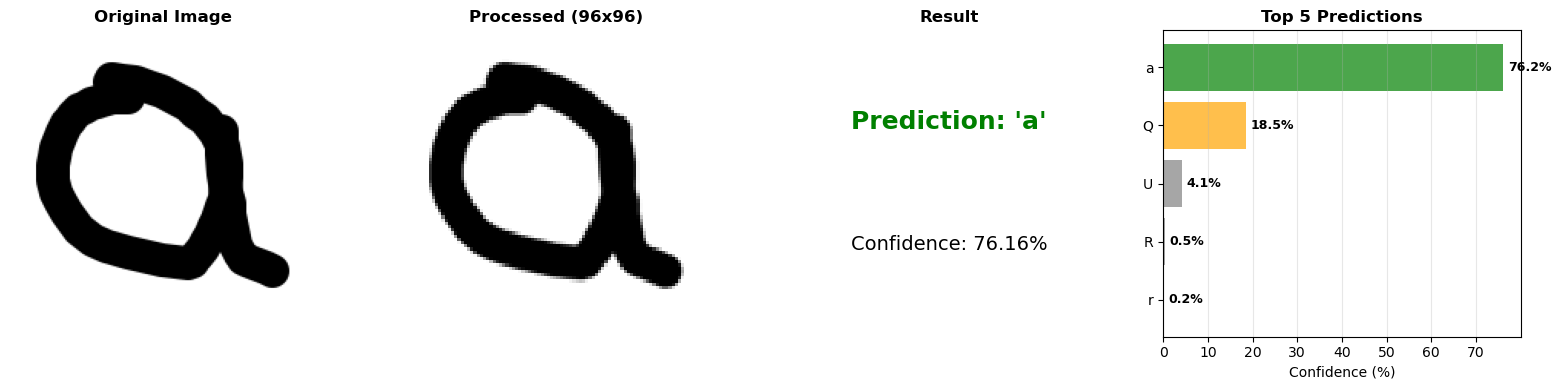


 PREDICTION COMPLETED SUCCESSFULLY!
 Final Result: 'a' with 76.16% confidence


In [7]:
# ============================================================================
# 🚀 QUICK PREDICTION - PREDICT YOUR CUSTOM IMAGE
# ============================================================================

# Check if model is loaded and image exists
if loaded_model is not None:
    if os.path.exists(CUSTOM_IMAGE_PATH):
        # Predict the custom image
        # Set show_full_details=False for simple output (percentages only)
        # Set show_full_details=True for detailed technical information
        results = predict_image_with_details(
            image_path=CUSTOM_IMAGE_PATH,
            model=loaded_model,
            top_k=5,
            show_full_details=False  # 🔥 Change to True for detailed output
        )
        
        if results:
            print("\n" + "=" * 70)
            print(" PREDICTION COMPLETED SUCCESSFULLY!")
            print("=" * 70)
            print(f" Final Result: '{results['predicted_character']}' with {results['confidence']:.2f}% confidence")
            print("=" * 70)
        else:
            print(" Failed to predict image.")
            
    else:
        print(f" Custom image not found: {CUSTOM_IMAGE_PATH}")
        print("\n To predict your custom image:")
        print("   1. Update the CUSTOM_IMAGE_PATH variable in the Configuration section")
        print("   2. Re-run the Configuration cell")
        print("   3. Run this cell again")
        print()
        print("   Example paths:")
        print("   - Linux/Mac: '/home/user/Pictures/my_image.png'")
        print("   - Windows: r'C:\\Users\\YourName\\Pictures\\my_image.jpg'")
        
else:
    print(" Model not loaded. Please run the model loading cells first.")